In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Градиентынй бустинг "в лоб"

В этой части работы решение получается с помощью градиентного бустинга.

In [13]:
features = pd.read_csv('features.csv')#считывание файла features
features_test = pd.read_csv('features_test.csv')#считывание test_features

In [3]:
features.head()#топ строк для просмотра структуры

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
0,0,1430198770,7,11,5,2098,1489,20,0,0,...,4,2,2,-52,2874,1,1796,0,51,0
1,1,1430220345,0,42,4,1188,1033,9,0,1,...,4,3,1,-5,2463,1,1974,0,63,1
2,2,1430227081,7,33,4,1319,1270,22,0,0,...,4,3,1,13,2130,0,0,1830,0,63
3,3,1430263531,1,29,4,1779,1056,14,0,0,...,4,2,0,27,1459,0,1920,2047,50,63
4,4,1430282290,7,13,4,1431,1090,8,1,0,...,3,3,0,-16,2449,0,4,1974,3,63


In [4]:
features_test.head()#топ строк для просмотра структуры

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,6,1430287923,0,93,4,1103,1089,8,0,1,...,0,12,247,-86,272,3,4,2,0,118
1,7,1430293357,1,20,2,556,570,1,0,0,...,2,-29,168,-54,NaN,3,2,2,1,16
2,10,1430301774,1,112,2,751,808,1,0,0,...,1,-22,46,-87,186,1,3,3,0,-34
3,13,1430323933,1,27,3,708,903,1,1,1,...,2,-49,30,-89,210,3,4,2,1,-26
4,16,1430331112,1,39,4,1259,661,4,0,0,...,0,36,180,-86,180,1,3,2,1,-33


In [5]:
count = features.count() #подсчет числа заполненных полей

In [6]:
print count #выведем на экран

match_id                       97230
start_time                     97230
lobby_type                     97230
r1_hero                        97230
r1_level                       97230
r1_xp                          97230
r1_gold                        97230
r1_lh                          97230
r1_kills                       97230
r1_deaths                      97230
r1_items                       97230
r2_hero                        97230
r2_level                       97230
r2_xp                          97230
r2_gold                        97230
r2_lh                          97230
r2_kills                       97230
r2_deaths                      97230
r2_items                       97230
r3_hero                        97230
r3_level                       97230
r3_xp                          97230
r3_gold                        97230
r3_lh                          97230
r3_kills                       97230
r3_deaths                      97230
r3_items                       97230
r

# Целевая переменная в radiant win.

Признаки с пропусками:

first_blood_time               77677

first_blood_team               77677

first_blood_player1            77677

first_blood_player2            53243

radiant_bottle_time            81539

radiant_courier_time           96538

radiant_flying_courier_time    69751

radiant_first_ward_time        95394

dire_bottle_time               81087

dire_courier_time              96554

dire_flying_courier_time       71132

dire_first_ward_time           95404

Курьера можно и не покупать (но лучше его иметь, конечно),а уж летающего вообще не обязательно иметь.Поэтому столбцы, связанные с курьером имеют пропуски.

In [14]:
features = features.fillna(value=0)#заполнение пустых полей
features_test = features_test.fillna(value=0)#заполнение пустых полей

In [9]:
from sklearn import cross_validation#импорт кросс-валидации
kf = cross_validation.KFold(len(features),n_folds=5,shuffle=True,random_state=241)#задаем кросс-валидацию

In [15]:
features_target = features['radiant_win']#выбираем целевой столбец

In [16]:
features_train = features.drop(['duration','radiant_win','tower_status_radiant','tower_status_dire','barracks_status_dire','barracks_status_radiant'],axis=1)#удаляем столбцы, которые заглядывают в будущее

In [18]:
features_train.head()#новый датасет без столбцов, которые заглядывают в будущее

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,0,1430198770,7,11,5,2098,1489,20,0,0,...,0,35,103,-84,221,3,4,2,2,-52
1,1,1430220345,0,42,4,1188,1033,9,0,1,...,0,-20,149,-84,195,5,4,3,1,-5
2,2,1430227081,7,33,4,1319,1270,22,0,0,...,1,-39,45,-77,221,3,4,3,1,13
3,3,1430263531,1,29,4,1779,1056,14,0,0,...,0,-30,124,-80,184,0,4,2,0,27
4,4,1430282290,7,13,4,1431,1090,8,1,0,...,0,46,182,-80,225,6,3,3,0,-16


In [21]:
from sklearn import ensemble #импортируем ensemble
import sklearn.cross_validation #импортируем кросс-валидацию

In [22]:
score = []#список результатов
n_est = [x for x in range(10,40,10)]#число деревьев (10-30)
print n_est#выводим число деревьев
for n in n_est:
    alg = ensemble.GradientBoostingClassifier(n_estimators=n, verbose=True, random_state=241)#класификатор на градиентном бустинге
    alg.fit(features_train, features_target)#обучаем класификатор
    score.append(sklearn.cross_validation.cross_val_score(alg,features_train, features_target,cv=kf, n_jobs=-1,scoring='roc_auc').mean())
    #к списку результатов добавляем средний получившийся на кросс-валидации результат по roc_auc score

[10, 20, 30]
      Iter       Train Loss   Remaining Time 
         1           1.3786           21.19s
         2           1.3732           18.99s
         3           1.3681           17.45s
         4           1.3636           14.66s
         5           1.3589           12.17s
         6           1.3547            9.95s
         7           1.3502            7.42s
         8           1.3461            4.91s
         9           1.3422            2.45s
        10           1.3385            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3786           46.49s
         2           1.3732           43.67s
         3           1.3681           41.30s
         4           1.3636           38.89s
         5           1.3589           36.27s
         6           1.3547           33.81s
         7           1.3502           31.25s
         8           1.3461           28.76s
         9           1.3422           26.34s
        10           1.3385           23

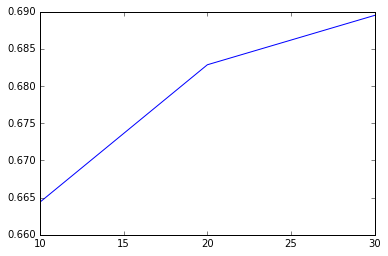

In [23]:
plt.plot(n_est,score) #график результатов

Можно заметить, что качество улучшается при росте количества дереьев

In [24]:
#время кроссвалидации для 30 деревьев
import time
import datetime

start_time = datetime.datetime.now()

alg = ensemble.GradientBoostingClassifier(n_estimators=n, verbose=True, random_state=241,subsample=0.5)#класификатор на градиентном бустинге
alg.fit(features_train, features_target)#обучаем класификатор
print "roc-auc for 30 trees: ", sklearn.cross_validation.cross_val_score(alg,features_train, features_target,cv=kf, n_jobs=-1,scoring='roc_auc').mean()

print 'Time elapsed:', datetime.datetime.now() - start_time

      Iter       Train Loss   Remaining Time 
         1           1.3786            1.09m
         2           1.3732            1.05m
         3           1.3681            1.01m
         4           1.3636           58.51s
         5           1.3589           55.94s
         6           1.3547           53.98s
         7           1.3502           51.73s
         8           1.3461           49.42s
         9           1.3422           47.02s
        10           1.3385           44.65s
        20           1.3092           22.05s
        30           1.2892            0.00s
roc-auc for 30 trees:  0.689496203941
Time elapsed: 0:04:19.762000


В итоге получается рост качетсва модели с ростом числа деревьев. Я бы предложил продолжить обучение, а так же продолжить подбор памаметров для улучшения качества модели.

Для ускорения обучения можно использовать:

- Подвыборки по объектам
- Подвыборки по признакам
- Увеличить шаг обучения
- Уменьшить число Folds при кросс-валидации

# Логистическая регрессия
В это части рассматривается решение с помощью логистической регрессии.

In [26]:
from sklearn.preprocessing import StandardScaler #импортируем Scaler для нормализации признаков

In [33]:
scaler = StandardScaler() #инициализируем scaler
scaled_train = scaler.fit_transform(features_train) #нормализация train
scaled_test = scaler.fit_transform(features_test) #нормализация test

In [29]:
from sklearn.linear_model import LogisticRegression #имортируем логисчтиескую регрессию

In [63]:
logr_score = []#список результатов
c_est = [0.01, 0.1, 1.0, 10, 100, 1000, 10000]#значения C для перебора
for c in c_est:
    start_time = datetime.datetime.now()
    logr = LogisticRegression(penalty='l2',C=c,random_state=241,n_jobs=-1,verbose=True)#логистическая регрессия
    logr.fit(scaled_train, features_target)#обучаем класификатор
    logr_score.append(sklearn.cross_validation.cross_val_score(logr,scaled_train, features_target,cv=kf, n_jobs=-1,scoring='roc_auc').mean())
    #к списку результатов добавляем средний получившийся на кросс-валидации результат по roc_auc score
    print 'Time elapsed for c =', c,':', datetime.datetime.now() - start_time

[LibLinear]Time elapsed for c = 0.01 : 0:01:21.259000
[LibLinear]Time elapsed for c = 0.1 : 0:00:42.330000
[LibLinear]Time elapsed for c = 1.0 : 0:00:48.361000
[LibLinear]Time elapsed for c = 10 : 0:00:33.553000
[LibLinear]Time elapsed for c = 100 : 0:00:32.333000
[LibLinear]Time elapsed for c = 1000 : 0:00:31.213000
[LibLinear]Time elapsed for c = 10000 : 0:00:32.092000


In [64]:
logr_score #удобнее выводить значениями из-за малой разницы

[0.71637968521032014,
 0.71633926534394698,
 0.71633417827895307,
 0.71633347712625761,
 0.7163334993678413,
 0.71633347818686255,
 0.71633348242467798]

Лучшее качество - 0.71637968521032014. Вышло большим, чем градиентный бустинг.
Вероятно, это из-за того, что мы почти не подбирали параметры для бустинга. Либо, данные хорошо подходят для линейных методов.

In [44]:
features_train_copy = features_train.drop(['lobby_type','r1_hero','r2_hero','r3_hero','r4_hero','r5_hero','d1_hero','d2_hero','d3_hero','d4_hero','d5_hero'],axis=1)
#убрали тип лобби и выбранных героев из данных

In [46]:
scaled_train_copy = scaler.fit_transform(features_train_copy) #scaling для набора данных без информации о героях

In [65]:
logr_score = []#список результатов
c_est = [0.01, 0.1, 1.0, 10, 100, 1000, 10000]#значения C для перебора
for c in c_est:
    start_time = datetime.datetime.now()
    logr = LogisticRegression(penalty='l2',C=c,random_state=241,n_jobs=-1,verbose=True)#логистическая регрессия
    logr.fit(scaled_train_copy, features_target)#обучаем класификатор
    logr_score.append(sklearn.cross_validation.cross_val_score(logr,scaled_train_copy, features_target,cv=kf, n_jobs=-1,scoring='roc_auc').mean())
    #к списку результатов добавляем средний получившийся на кросс-валидации результат по roc_auc score
    print 'Time elapsed for c =', c,':', datetime.datetime.now() - start_time

[LibLinear]Time elapsed for c = 0.01 : 0:00:31.110000
[LibLinear]Time elapsed for c = 0.1 : 0:00:28.590000
[LibLinear]Time elapsed for c = 1.0 : 0:00:28.453000
[LibLinear]Time elapsed for c = 10 : 0:00:28.481000
[LibLinear]Time elapsed for c = 100 : 0:00:30.031000
[LibLinear]Time elapsed for c = 1000 : 0:00:30.012000
[LibLinear]Time elapsed for c = 10000 : 0:00:28.230000


In [66]:
logr_score #удобнее выводить значениями из-за малой разницы

[0.71643768152297438,
 0.71640098484036052,
 0.71639582099638233,
 0.71639570358725313,
 0.71639562098557885,
 0.71639560298999228,
 0.71639560934871205]

Лучшее качество - 0.71643768152297438, которое немного лучше значения, полученного без исключения информации о героях. 
Получено при c = 0.01.
Скорее всего, использование категоричальных признаков без их перекодирования, приводит к некоторому ухудшению качества предсказаний.

In [99]:
unique_heroes = []
for name in ['r1_hero','r2_hero','r3_hero','r4_hero','r5_hero','d1_hero','d2_hero','d3_hero','d4_hero','d5_hero']:
    for u in pd.unique(features_train[name]):
        if u not in unique_heroes:
            unique_heroes.append(u)
print 'len of unique heroes sequence:', len(unique_heroes)
print 'min and max hero id:',min(unique_heroes),'-', max(unique_heroes)

len of unique heroes sequence: 108
min and max hero id: 1 - 112


## Всего в игре 112 персонажей. Часть персонажей почему-то не была взята ни разу.
## Id персонажей заканчивается на значении 112.

In [100]:
#bag of words из примера
X_pick = np.zeros((features_train.shape[0], 112))

for i, match_id in enumerate(features_train.index):
    for p in xrange(5):
        X_pick[i, features_train.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, features_train.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

In [102]:
scaled_pick = scaler.fit_transform(X_pick) #scaling для pick'а

In [104]:
scaled_train_bag = np.hstack((scaled_train_copy,scaled_pick)) #объединяем информацию

In [105]:
bag_score = []#список результатов
c_est = [0.01, 0.1, 1.0, 10, 100, 1000, 10000]#значения C для перебора
for c in c_est:
    start_time = datetime.datetime.now()
    logr = LogisticRegression(penalty='l2',C=c,random_state=241,n_jobs=-1,verbose=True)#логистическая регрессия
    logr.fit(scaled_train_bag, features_target)#обучаем класификатор
    bag_score.append(sklearn.cross_validation.cross_val_score(logr,scaled_train_bag, features_target,cv=kf, n_jobs=-1,scoring='roc_auc').mean())
    #к списку результатов добавляем средний получившийся на кросс-валидации результат по roc_auc score
    print 'Time elapsed for c =', c,':', datetime.datetime.now() - start_time

[LibLinear]Time elapsed for c = 0.01 : 0:02:24.268000
[LibLinear]Time elapsed for c = 0.1 : 0:02:36.132000
[LibLinear]Time elapsed for c = 1.0 : 0:02:33.802000
[LibLinear]Time elapsed for c = 10 : 0:01:37.912000
[LibLinear]Time elapsed for c = 100 : 0:01:22.512000
[LibLinear]Time elapsed for c = 1000 : 0:01:26.318000
[LibLinear]Time elapsed for c = 10000 : 0:01:53.732000


In [106]:
bag_score

[0.75196916569788841,
 0.75191224446526883,
 0.75190435548856471,
 0.75190368890352588,
 0.75190367298922678,
 0.75190364861601211,
 0.75190364014098954]

Лучшее качество - 0.75196916569788841. Серьезное улучшение по сравнению с предыдующей попыткой.
Стоит полагать, что подбор персонажей - информативный признак, который серьезно влияет на точность предсказаний. И это неудивительно, т.к. большую часть игры составляет умение подбора такого сочетания персонажей, которое бы имело преимущество над соперником.

In [108]:
#проделаем над тестовым набором те же преобразования, что и над обучающим

In [107]:
features_test_copy = features_test.drop(['lobby_type','r1_hero','r2_hero','r3_hero','r4_hero','r5_hero','d1_hero','d2_hero','d3_hero','d4_hero','d5_hero'],axis=1)

In [109]:
scaled_test_copy = scaler.fit_transform(features_test_copy) #scaling для набора данных без информации о героях

In [110]:
#bag of words из примера
X_test_pick = np.zeros((features_test.shape[0], 112))

for i, match_id in enumerate(features_test.index):
    for p in xrange(5):
        X_test_pick[i, features_test.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_test_pick[i, features_test.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

In [112]:
scaled_test_pick = scaler.fit_transform(X_test_pick) #scaling для pick'а

In [113]:
scaled_test_bag = np.hstack((scaled_test_copy,scaled_test_pick)) #объединяем информацию

In [114]:
logr_result = LogisticRegression(penalty='l2',C=0.01,random_state=241,n_jobs=-1,verbose=True)
logr_result.fit(scaled_train_bag, features_target)#обучаем класификатор
probabilities = logr_result.predict_proba(scaled_test_bag)

[LibLinear]

In [120]:
print probabilities #вероятости классов

[[ 0.1702269   0.8297731 ]
 [ 0.23826116  0.76173884]
 [ 0.8060362   0.1939638 ]
 ..., 
 [ 0.75529882  0.24470118]
 [ 0.35827183  0.64172817]
 [ 0.5582418   0.4417582 ]]


In [119]:
print 'максимумы вероятностей:',max(probabilities[:,0]),
print max(probabilities[:,1])
print 'минимумы вероятностей:',min(probabilities[:,0]),
print min(probabilities[:,1])

максимумы вероятностей: 0.991404958922 0.996403192335
минимумы вероятностей: 0.00359680766477 0.0085950410782


## Максимальные вероятности классов находятся на отрезке [0,1] - значит, мы получили правильные результаты. Вероятности не константы, модель получилась не контсатной.